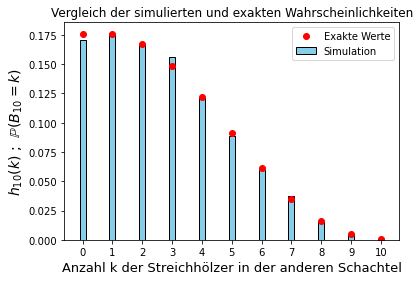

Anzahl der Streichhölzer: 10
B_n: zufällige Anzahl der noch in der anderen Schachtel befindlichen Streichhölzer
Anzahl der Simulationen: 10000
Erwartungswert aus der Simulation: 2.7068
Exakter Erwartungswert: 2.7001


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb

# Simulation des Banachschen Streichholzproblems
def simulate(n, num_simulations):
    counts = np.zeros(n + 1, dtype=int)
    
    for _ in range(num_simulations):
        pockets = [n, n]
        
        while True:
            chosen_pocket = np.random.choice(2)
            if pockets[chosen_pocket] == 0:
                other_pocket = 1 - chosen_pocket
                counts[pockets[other_pocket]] += 1
                break
            
            pockets[chosen_pocket] -= 1
    
    probabilities = counts / num_simulations
    # Berechnung des Erwartungswerts aus der Simulation
    expected_value_sim = np.sum(np.arange(n + 1) * probabilities)
    
    return probabilities, expected_value_sim

# Exakte Wahrscheinlichkeiten berechnen
def exact_probabilities(n):
    probs = np.zeros(n + 1)
    for k in range(n + 1):
        binomial_coefficient = comb(2 * n - k, n, exact=True)
        probs[k] = binomial_coefficient * (0.5 ** (2 * n - k))
    return probs

# Exakten Erwartungswert berechnen
def exact_expected_value(n):
    exact_probs = exact_probabilities(n)  # Verwende hier einen eindeutigen Variablennamen
    # Berechnung des Erwartungswerts durch gewichtetes Mittel
    expected_value_exact = np.sum(np.arange(n + 1) * exact_probs)
    return expected_value_exact

# Plotten des Vergleichs der simulierten und exakten Wahrscheinlichkeiten
def plot_bar_chart(sim_probabilities, exact_probs, n):
    x = np.arange(n + 1)
    
    #colors = plt.cm.viridis(np.linspace(0, 1, n + 1))
    bar_width = 0.2
    
    fig, ax = plt.subplots()
    bars = ax.bar(x, sim_probabilities, color='skyblue', edgecolor='black', width=bar_width, label='Simulation')
    
    # Plotten der exakten Wahrscheinlichkeiten als Punkte
    ax.plot(x, exact_probs, 'ro', label='Exakte Werte')  # 'ro' für rote Punkte

    ax.set_xlabel('Anzahl k der Streichhölzer in der anderen Schachtel',
                 fontsize=13)
    #ax.set_ylabel('Wahrscheinlichkeit',fontsize=14)
    ax.set_ylabel(r'$h_{{{0}}}(k)$ ;  $\mathbb{{P}}(B_{{{0}}} = k)$'.format(n),fontsize=14)
    ax.set_title('Vergleich der simulierten und exakten Wahrscheinlichkeiten')
    ax.legend()
    
    plt.xticks(x)
    plt.show()

# Setze die Parameter
n = 10  # Anzahl der Streichhölzer in jeder Schachtel
num_simulations = 10000  # Anzahl der Simulationen

# Führe die Simulation durch
sim_probabilities, expected_value_sim = simulate(n, num_simulations)

# Berechne die exakten Wahrscheinlichkeiten
exact_probs = exact_probabilities(n)  # Verwende hier den neuen Variablennamen

# Berechne den exakten Erwartungswert
expected_value_exact = exact_expected_value(n)

# Plotten des Stabdiagramms und der exakten Wahrscheinlichkeiten
plot_bar_chart(sim_probabilities, exact_probs, n)

print('Anzahl der Streichhölzer:',n)
print('B_n: zufällige Anzahl der noch in der anderen Schachtel befindlichen Streichhölzer')
print('Anzahl der Simulationen:',num_simulations)
# Ausgabe der Erwartungswerte
print(f"Erwartungswert aus der Simulation: {expected_value_sim:.4f}")
print(f"Exakter Erwartungswert: {expected_value_exact:.4f}")
